# Options Calculator with Trinomial model

Here is the wiki - https://en.wikipedia.org/wiki/Trinomial_tree

In [5]:
## import certain packages
import math
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

##### Input

In [25]:
## input the current stock price and check if it is a number.
S = input("What is the current stock price? ");
while True:
    try:
        S = float(S)
        break
    except:
        print("The current stock price has to be a NUMBER.")
        S = input("What is the current stock price? ")

## input the strike price and check if it is a number.
K = input("What is the strike price? ");
while True:
    try:
        K = float(K)
        break
    except:
        print("The the strike price has to be a NUMBER.")
        K = input("What is the strike price? ")


## input the expiration_date and calculate the days between today and the expiration date.
while True:
    expiration_date = input("What is the expiration date of the options? (mm-dd-yyyy) ")
    try:
        expiration_date = datetime.strptime(expiration_date, "%m-%d-%Y")
    except ValueError as e:
        print("error: %s\nTry again." % (e,))
    else:
        break
T = (expiration_date - datetime.utcnow()).days / 365


## input the continuously compounding risk-free interest rate and check if it is a number.
r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ");
while True:
    try:
        r = float(r)
        break
    except:
        print("The continuously compounding risk-free interest rate has to be a NUMBER.")
        r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")
        

## input the volatility and check if it is a number.
sigma = input("What is the volatility in percentage(%)? "); 
while True:
    try:
        sigma = float(sigma)
        if sigma > 100 or sigma < 0:
            print ( "The range of sigma has to be in [0,100].")
            sigma = input("What is the volatility in percentage(%)? ")
        break
    except:
        print("The volatility has to be a NUMBER.")
        sigma = input("What is the volatility in percentage(%)? ")

What is the current stock price?  100
What is the strike price?  110
What is the expiration date of the options? (mm-dd-yyyy)  08-28-2027
What is the continuously compounding risk-free interest rate in percentage(%)?  6
What is the volatility in percentage(%)?  30


In [26]:
data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,100.000000
Strike price,K,110.000000
Time to maturity,T,2.994521
Risk-free interest rate,r,6.000000
Volatility,sigma,30.000000


##### Output

In [34]:
r = r/100; sigma = sigma/100;


In [30]:
import math

def Trinomial_Tree(S, K, T, r, sigma, N, Option_type):
    """
    S: Current price of the underlying asset
    K: Strike price of the option
    T: Time to maturity (in years)
    r: Risk-free interest rate
    sigma: Volatility of the underlying asset
    N: Number of time steps in the trinomial tree
    Option_type: 'C' for Call option, 'P' for Put option
    """
    
    # Calculate time step
    dt = T / N
    
    # Define the up, down, and unchanged factors
    
    u = math.exp(sigma * math.sqrt(2 * dt))
    d = 1 / u
    m = 1  # Middle value where the price doesn't change
    
    # Risk-neutral probabilities
    pu = ((math.exp(r * dt / 2) - math.exp(-sigma * math.sqrt(dt / 2))) /
          (math.exp(sigma * math.sqrt(dt / 2)) - math.exp(-sigma * math.sqrt(dt / 2)))) ** 2
    pd = ((math.exp(sigma * math.sqrt(dt / 2)) - math.exp(r * dt / 2)) /
          (math.exp(sigma * math.sqrt(dt / 2)) - math.exp(-sigma * math.sqrt(dt / 2)))) ** 2
    pm = 1 - pu - pd
    
    # Discount factor
    disc = math.exp(-r * dt)
    
    # Initialize asset prices at maturity
    ST = [[0 for _ in range(2 * i + 1)] for i in range(N + 1)]
    
    # Fill asset prices at maturity
    for i in range(N + 1):
        for j in range(2 * i + 1):
            ST[i][j] = S * (u ** max(j - i, 0)) * (d ** max(i - j, 0))
    
    # Initialize option values at maturity
    C = [0 for _ in range(2 * N + 1)]
    
    for j in range(2 * N + 1):
        if Option_type == 'C':
            C[j] = max(ST[N][j] - K, 0)
        elif Option_type == 'P':
            C[j] = max(K - ST[N][j], 0)
    
    # Backward induction through the trinomial tree
    for i in range(N - 1, -1, -1):
        for j in range(2 * i + 1):
            C[j] = disc * (pu * C[j + 2] + pm * C[j + 1] + pd * C[j])
    
    return C[0]

In [35]:

model_pricing = {'Option' : ['Call', 'Put'],
                          'Price': [Trinomial_Tree(S, K, T, r, sigma,1000,'C'),Trinomial_Tree(S, K, T, r, sigma,1000,'P')]}
model_pricing_frame = DataFrame(binomial_model_pricing, columns=[ 'Option', 'Price'], 
                   index = ['Trinomial_Tree','Trinomial_Tree'])                                        
model_pricing_frame

,Option,Price
Trinomial_Tree,Call,23.948970
Trinomial_Tree,Put,15.858906


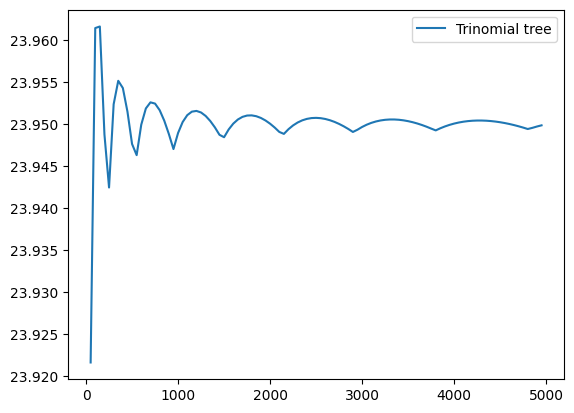

In [32]:
## call option with different steps 
runs1 = list(range(50,5000,50))
TT = []

for i in runs1:
    TT.append(Trinomial_Tree(S, K, T, r, sigma,i ,'C'))


plt.plot(runs1, TT, label='Trinomial tree')
plt.legend(loc='upper right')
plt.show()

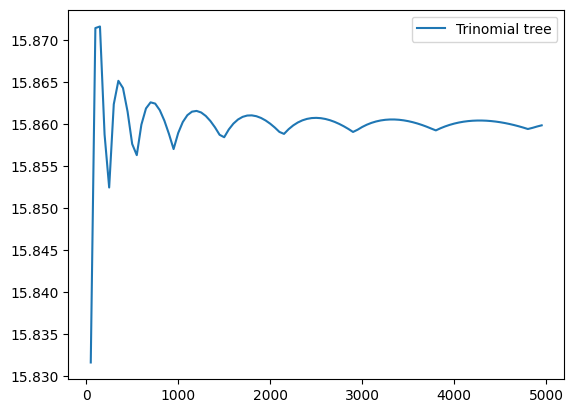

In [33]:
## call option with different steps 
runs1 = list(range(50,5000,50))
TT = []

for i in runs1:
    TT.append(Trinomial_Tree(S, K, T, r, sigma,i ,'P'))


plt.plot(runs1, TT, label='Trinomial tree')
plt.legend(loc='upper right')
plt.show()